<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Introducción

En este ejercicio generaremos un árbol de decisión que a través de Regresión, nos permita predecir si una persona sufrirá diabetes o no

## DataSet: Pacientes Enfermos con Diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Antes de modelar

### Cargamos y preparamos el dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
datos = load_diabetes()

X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [24]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [3]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelamiento (primeros pasos)

Usando la librería SKLEARN, generaremos un árbol de decisión para regresión

**INDICA QUE SIGNIFICAN CADA UNA DE LAS VARIABLES SIGUIENTES Y QUE INDICAN LAS MEDIDAS DE VERIFICACION USADAS.**

In [4]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(X, Y)

Yhat = mo2.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


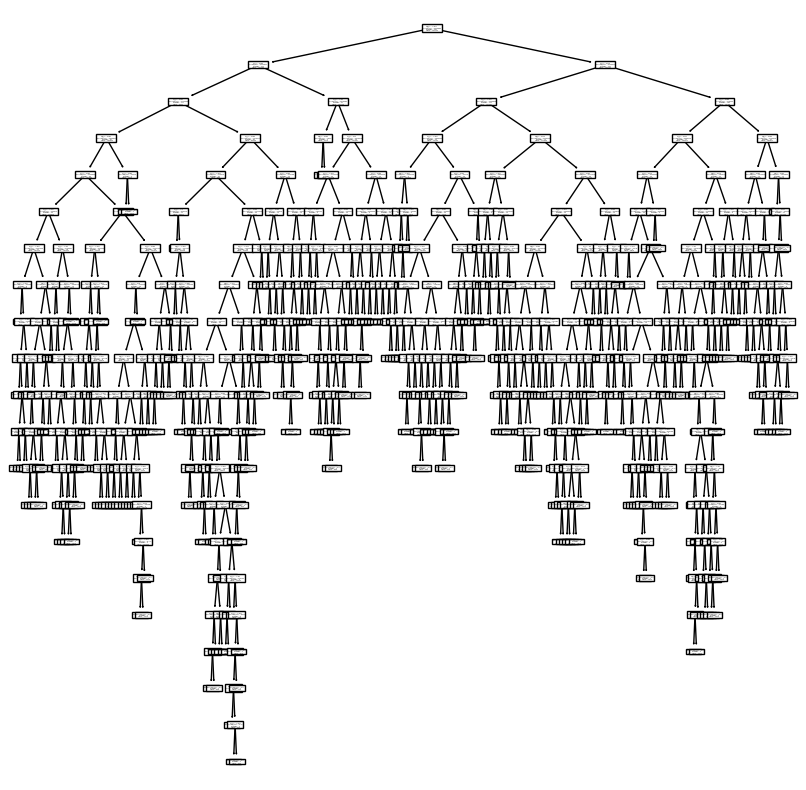

In [6]:
# Visualizamos el árbol generado!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo2) 

## Evitando el Overfitting

**INDICA : ¿por qué existe OVERFITTING?**

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  5875.0224719101125
MAE:  60.12359550561798
R^2:  -0.09583271794462189


In [9]:
1 - sum((Ytest - Yhat)**2)/sum((Ytest - Ytest.mean())**2)
#sum((Yhat - Ytest.mean())**2)/sum((Ytest - Ytest.mean())**2)

-0.09583271794462167

In [10]:
mo2.feature_importances_

array([0.07165933, 0.0050082 , 0.43130155, 0.0948119 , 0.05407998,
       0.0740518 , 0.05297386, 0.00662958, 0.17897673, 0.03050707])

In [11]:
Xtrain.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Sintonización del modelo

**INDICA :** 

¿cómo se realiza esta sintonización?

 ¿qué hiperparámetros se están modificando?

 ¿qué ocurre si ingresas otros valores?....prueba



In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.43352192753185353
{'max_depth': 3, 'min_samples_split': 2}


In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005682,0.003617,0.004656,0.003985,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.283014,0.488780,0.561811,0.382590,0.383581,0.431652,0.373181,0.322981,0.477110,0.630520,0.433522,0.101894,1
1,0.004072,0.000772,0.002398,0.000311,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.283014,0.488780,0.561811,0.382590,0.383581,0.431652,0.373181,0.322981,0.477110,0.630520,0.433522,0.101894,1
2,0.004365,0.001436,0.003271,0.002040,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.283014,0.488780,0.561811,0.382590,0.383581,0.431652,0.373181,0.322981,0.477110,0.630520,0.433522,0.101894,1
3,0.004806,0.001958,0.002434,0.000795,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.196983,0.513955,0.456620,0.143016,0.254818,0.256374,0.235539,0.233685,0.464169,0.538383,0.329354,0.139004,6
4,0.003628,0.000057,0.002028,0.000032,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.196983,0.513955,0.456620,0.143016,0.254818,0.256374,0.235539,0.248014,0.464169,0.538383,0.330787,0.138082,4
5,0.003928,0.000449,0.002146,0.000181,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.196983,0.513955,0.456620,0.143016,0.254818,0.256374,0.235539,0.248014,0.464169,0.538383,0.330787,0.138082,4
6,0.004150,0.000298,0.002526,0.000658,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.226417,0.417153,0.498370,0.182580,0.275453,0.146519,0.046279,0.351809,0.375411,0.486588,0.300658,0.142826,7
7,0.003941,0.000153,0.002039,0.000069,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.226417,0.381485,0.498370,0.074202,0.275453,0.146519,0.046279,0.338489,0.375411,0.486588,0.284921,0.151866,9
8,0.004017,0.000115,0.002124,0.000123,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.226417,0.381485,0.498370,0.070535,0.275453,0.146519,0.046279,0.338397,0.375411,0.511012,0.286988,0.155752,8


**Usar otra función de scoring/loss para elegir el "mejor" modelo**

**INVESTIGA** COMO SE USAN ESTAS FUNCIONES



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [16]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.43352192753185353
{'max_depth': 3, 'min_samples_split': 2}


In [18]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                              0.004171
std_fit_time                                               0.001152
mean_score_time                                            0.002289
std_score_time                                             0.000366
param_max_depth                                                   3
param_min_samples_split                                           2
params                     {'max_depth': 3, 'min_samples_split': 2}
split0_test_score                                          0.283014
split1_test_score                                           0.48878
split2_test_score                                          0.561811
split3_test_score                                           0.38259
split4_test_score                                          0.383581
split5_test_score                                          0.431652
split6_test_score                                          0.373181
split7_test_score                               

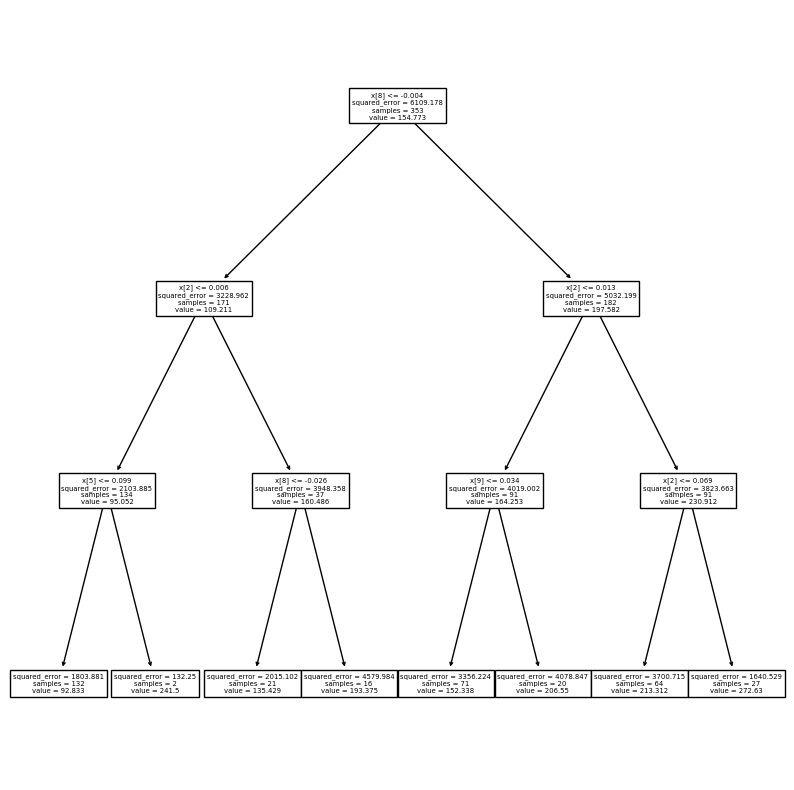

In [19]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(grid.best_estimator_) 

### Graficamos los resultamos estimados

4852.425755285975
54.77389722228502
0.04507663976010845


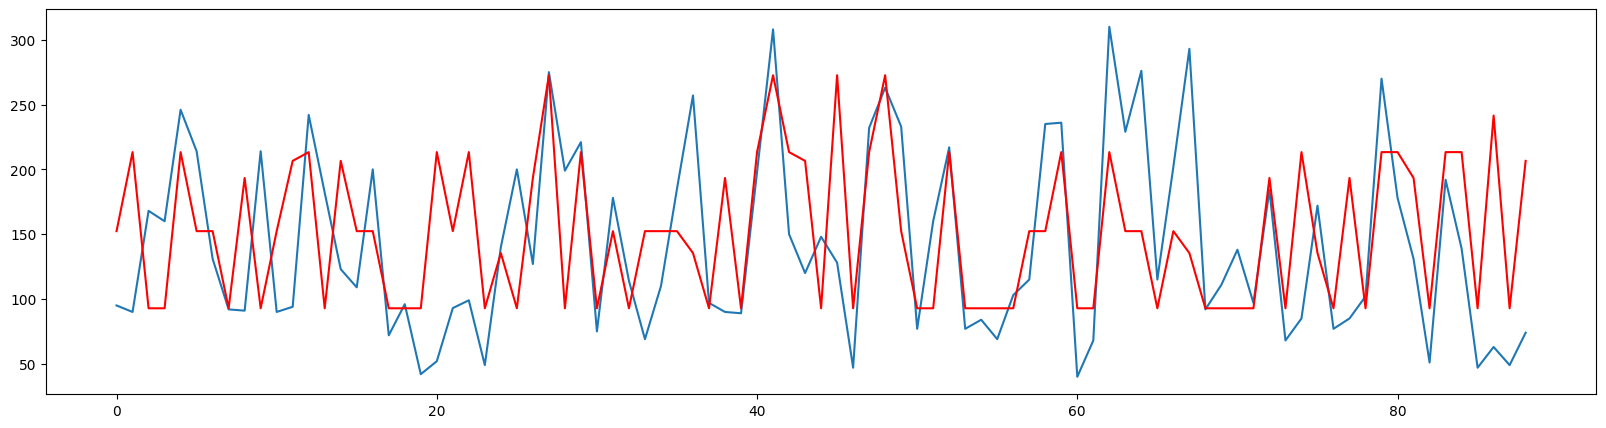

In [20]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')

In [21]:
np.unique(Yhat)

array([ 92.83333333, 135.42857143, 152.33802817, 193.375     ,
       206.55      , 213.3125    , 241.5       , 272.62962963])

In [22]:
Yhat

array([152.33802817, 213.3125    ,  92.83333333,  92.83333333,
       213.3125    , 152.33802817, 152.33802817,  92.83333333,
       193.375     ,  92.83333333, 152.33802817, 206.55      ,
       213.3125    ,  92.83333333, 206.55      , 152.33802817,
       152.33802817,  92.83333333,  92.83333333,  92.83333333,
       213.3125    , 152.33802817, 213.3125    ,  92.83333333,
       135.42857143,  92.83333333, 193.375     , 272.62962963,
        92.83333333, 213.3125    ,  92.83333333, 152.33802817,
        92.83333333, 152.33802817, 152.33802817, 152.33802817,
       135.42857143,  92.83333333, 193.375     ,  92.83333333,
       213.3125    , 272.62962963, 213.3125    , 206.55      ,
        92.83333333, 272.62962963,  92.83333333, 213.3125    ,
       272.62962963, 152.33802817,  92.83333333,  92.83333333,
       213.3125    ,  92.83333333,  92.83333333,  92.83333333,
        92.83333333, 152.33802817, 152.33802817, 213.3125    ,
        92.83333333,  92.83333333, 213.3125    , 152.33

# CONCLUSIONES

Reflexiona sobre lo realizado y explica:

¿qué indica el árbol ganador? ¿por qué es un "ganador"?

¿que efectos tienen el manejar los hiperparámetros?

Comparte tus conclusiones con la clase.